In [1]:
import numpy as np
import time
import csv
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [21]:
is_vae = True

In [22]:
# Just choose the name of the dataset directory
DATA_DIR = '/Users/tomas/Documents/FEUP/Tese/data/ml-20m/processed_70_10_20'
if is_vae:
    PARSE_DATA_DIR = os.path.join(DATA_DIR, 'embeddings/vae')
else:
    PARSE_DATA_DIR = os.path.join(DATA_DIR, 'embeddings/cdae')

In [23]:
file = 'metadataset_k_20.csv'

In [32]:
#read in the data using pandas
metadataset = pd.read_csv(os.path.join(PARSE_DATA_DIR, file ))
metadataset.head()

,original_id,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,first_place
0,7648,-0.431028,0.273519,0.000467,-0.021366,0.411798,0.445795,1.206461,0.437548,-0.670044,...,1.261934,0.238986,0.150137,-0.024725,-0.349221,3.509393,-0.146421,1.508804,-0.859744,als_ndcg
1,10208,0.351687,-0.626017,0.034143,-0.080265,0.101129,-0.229498,0.261393,-1.189405,-0.451783,...,0.964082,0.825656,0.064932,0.042978,-1.043557,0.562128,0.234560,0.813003,0.511105,zeroes
2,13315,-0.706174,-0.031290,-0.005091,-0.097111,0.111871,0.484369,0.737223,-1.132764,1.119018,...,1.040254,-1.375516,-0.064951,0.030435,0.757224,0.444452,0.753969,-0.582505,0.761838,bpr_ndcg
3,16144,0.672244,-0.958536,-0.005133,-0.093083,0.118219,-0.325690,1.434977,0.006304,-0.780396,...,1.159395,-0.746610,0.042197,0.038217,-0.813577,1.753534,-0.063353,-0.829087,-1.122440,most_popular_ndcg
4,18064,-0.813108,0.897909,-0.105261,0.080410,0.099298,-1.109625,2.775797,0.139941,-0.745728,...,0.584199,0.619601,0.027197,0.051431,-1.668557,1.609979,-1.117613,1.222671,-2.145877,lmf_ndcg


In [11]:
print("als: ", 34215/129757 * 100,"bpr: ", 25925/129757 * 100,"most_popular_ndcg: ", 29088/129757 * 100,"lmf_ndcg: ", 19252/129757 * 100,"zeros: ", 21277/129757 * 100 )

als:  26.36851961743875 bpr:  19.979654276840556 most_popular_ndcg:  22.417287699314873 lmf_ndcg:  14.836964479758317 zeros:  16.397573926647503


In [33]:
normalize = True

In [34]:
if normalize:
  #---- SET INPUTS -----
  scaler = StandardScaler()
  #Compute the mean and std to be used for later scaling.
  scaler.fit(metadataset.drop(columns=['first_place','original_id']))
  # Perform standardization by centering and scaling
  inputs_transform = scaler.transform(metadataset.drop(columns=['first_place','original_id']))
  inputs = pd.DataFrame(inputs_transform)
  inputs.head()
else:
  inputs = metadataset.drop(columns=['first_place','original_id'])


In [36]:
#als:0
#bpr:1
#lmf:2
#most_pop_3
#zeros:4
target_pre = metadataset['first_place'].values 
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target_pre)

keys = label_encoder.classes_
values = label_encoder.transform(keys)
labels = dict(zip(values,keys))

In [35]:
inputs.to_csv(os.path.join(PARSE_DATA_DIR, 'inputs_norm.tsv' ), sep='\t', header=False, index=False)

In [37]:
pd.DataFrame(target).to_csv(os.path.join(PARSE_DATA_DIR, 'labels.tsv'), sep='\t', header=False, index=False)

In [18]:
# Subset first 20k data points to visualize
x_subset = inputs[0:50000]
y_subset = target[0:50000]
print(np.unique(y_subset))

[0 1 2 3 4]


In [19]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.6750109195709229 seconds


In [20]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [9.99999577e-01 2.70250357e-07 4.51975094e-08 3.51559952e-08]


In [21]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-0.26454563542561754, 2.236275533980159e-05, '0'),
  Text(-0.26454563542561754, 2.236275533980159e-05, '1'),
  Text(-0.26454563542561754, 2.236275533980159e-05, '2'),
  Text(-0.26454563542561754, 2.236275533980159e-05, '3'),
  Text(-0.26454563542561754, 2.236275533980159e-05, '4')])

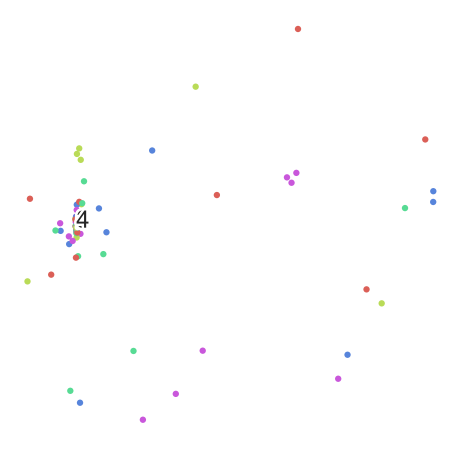

In [22]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

In [23]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

embeddings_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1600.515459060669 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(0.004207277, -0.1092724, '0'),
  Text(0.004836825, -0.10488278, '1'),
  Text(0.0065999567, -0.09012772, '2'),
  Text(0.023267599, -0.09629416, '3'),
  Text(0.022093952, -0.09957992, '4')])

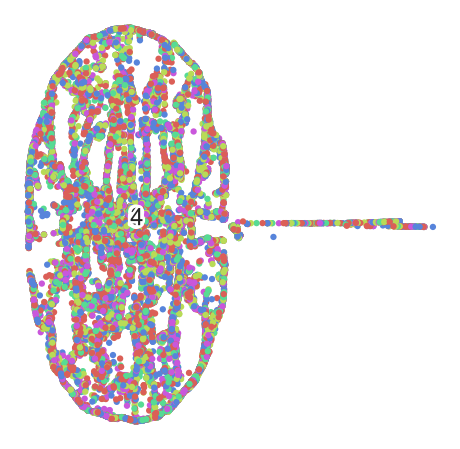

In [24]:
 fashion_scatter(embeddings_tsne, y_subset)

In [93]:
gridParams

{'learning_rate': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]),
 'num_leaves': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
 'colsample_bytree': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 'reg_alpha': array([0.05, 0.1 , 0.15, 0.2 , 0.25]),
 'reg_lambda': array([0.05, 0.1 , 0.15, 0.2 , 0.25]),
 'max_depth': array([ -1,  19,  39,  59,  79,  99, 119, 139, 159, 179, 199, 219, 239,
        259, 279, 299, 319, 339, 359, 379, 399])}